
# Proyecto
### Erick Fernando López Fimbres.  
#### erick.lopez.fimbres@gmail.com

## N-gramas

Una característica de los lenguajes naturales es que las frases que los componen no tienen una distribución uniforme. En cambio, existen muchas construcciones que son más comunes o utilizadas que otras. De esta manera, aunque las frases $f_1 = \textrm{"la niñera cuida a los bebes"}$ y $f_2 = \textrm{"la niñera cuida a los lobos"}$ son ambas correctas sintácticamente, es más probable encontrar la frase $f_1$ que la frase $f_2$ en un texto arbitrario.

El modelo más simple es el **"Modelo de N-Gramas"**. Este modelo asume que la probabilidad de ocurrencia de una palabra está determinada por las palabras recientes; lo que se conoce como la **suposición de Markov**. De manera que para el cálculo de estas probabilidades basta contabilizar la ocurrencia de secuencias de palabras de longitud definida. Un $N$-Grama es una secuencia de $N$ palabras. Así, por ejemplo, un 2-grama (o bigrama) es una secuencia de 2 palabras, como *"el gato", "gato corre", "corre en", "en el", "el patio"*. Un 3-grama (trigrama) es una secuencia de tres palabras, como *"el gato corre", "gato corre en", "corre en el", "en el patio"*.



A continuacion calcularemos los N-gramas de nuestro léxicon:

In [1]:
###   LO NECESARIO PARA USAR N-GRAMAS EN PYTHON   ######
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
from IPython.display import display
import pandas as pd
pd.options.display.max_colwidth = 150
import json
import re
#nltk.download() #descomenta esta linea si no tienes nltk


file = 'datos/enfermedades_limpia.json'
with open(file) as archivo_enfermedades:
    dict_enfermedades = json.load(archivo_enfermedades)

#Desplegar informacion organizada
enfermedadesDf = pd.DataFrame.from_dict(dict_enfermedades).reindex_axis(['nombre',"descripcion", "palabras_principales"], axis=1)
display(enfermedadesDf.head(1))


,nombre,descripcion,palabras_principales
0,Infantilismo,archivo windelfetischistjpg miniaturadeimagen un con infantilismo al tener el fetichismo del pañal el infantilismo es una enfermedad en la que per...,"[archivo, miniaturadeimagen, infantilismo, tener, pañal, infantilismo, enfermedad, persisten, adulto, diversas, características, anatomía, anatómi..."


In [2]:
enfermedadesDf["bigramas"] = list(map(lambda row: list(ngrams(word_tokenize(row),2)), 
                                   enfermedadesDf.descripcion))
display(enfermedadesDf.head())

bigramas_enfermedades = []
for row in enfermedadesDf.bigramas:
    bigramas_enfermedades.extend(row)
bigramas_mas_comunes_enfermedades = nltk.FreqDist(bigramas_enfermedades)

print("Cantidad de bigramas en el corpus: ", bigramas_mas_comunes_enfermedades.N())
print("\nBigramas más populares:\n", bigramas_mas_comunes_enfermedades.most_common(50))

,nombre,descripcion,palabras_principales,bigramas
0,Infantilismo,archivo windelfetischistjpg miniaturadeimagen un con infantilismo al tener el fetichismo del pañal el infantilismo es una enfermedad en la que per...,"[archivo, miniaturadeimagen, infantilismo, tener, pañal, infantilismo, enfermedad, persisten, adulto, diversas, características, anatomía, anatómi...","[(archivo, windelfetischistjpg), (windelfetischistjpg, miniaturadeimagen), (miniaturadeimagen, un), (un, con), (con, infantilismo), (infantilismo,..."
1,Pectus excavatum,el pectus excavatum es una deformidad congénita de la caja torácica caracterizada por pecho hundido en la región del esternón la probabilidad del ...,"[pectus, excavatum, deformidad, congénita, caja, torácica, caracterizada, pecho, hundido, región, esternón, probabilidad, pectus, excavatum, depen...","[(el, pectus), (pectus, excavatum), (excavatum, es), (es, una), (una, deformidad), (deformidad, congénita), (congénita, de), (de, la), (la, caja),..."
2,Pectus carinatum,el pectus carinatum es una deformidad de la caja torácica en la que el pecho protruye en quilla ave quilla de barco es menos frecuente que el pect...,"[pectus, carinatum, deformidad, caja, torácica, pecho, ave, menos, frecuente, pectus, excavatum, repercusiones, funcionales, menos, importantes, p...","[(el, pectus), (pectus, carinatum), (carinatum, es), (es, una), (una, deformidad), (deformidad, de), (de, la), (la, caja), (caja, torácica), (torá..."
3,Onfalocele,la onfalocele u onfalocele infantil también llamado exonfalocele se da en el momento en el que el embrión presenta las vísceras de la región abdom...,"[onfalocele, u, onfalocele, infantil, llamado, da, momento, embrión, presenta, vísceras, región, abdominal, cuerpo, aunque, casi, siempre, saco, d...","[(la, onfalocele), (onfalocele, u), (u, onfalocele), (onfalocele, infantil), (infantil, también), (también, llamado), (llamado, exonfalocele), (ex..."
4,Período prepatogénico,el período prepatogénico precede a las manifestaciones clínica s y está conformado por las condiciones del huésped el agente y el medio ambiente e...,"[período, precede, manifestaciones, clínica, s, condiciones, huésped, agente, medio, ambiente, período, aparición, manifieste, clínicamente, enfer...","[(el, período), (período, prepatogénico), (prepatogénico, precede), (precede, a), (a, las), (las, manifestaciones), (manifestaciones, clínica), (c..."


Cantidad de bigramas en el corpus:  1463230

Bigramas más populares:
 [(('de', 'la'), 15089), (('en', 'el'), 7598), (('de', 'los'), 7593), (('en', 'la'), 6840), (('de', 'las'), 4068), (('a', 'la'), 3784), (('que', 'se'), 3225), (('la', 'enfermedad'), 3200), (('síndrome', 'de'), 3073), (('en', 'los'), 2865), (('categoría', 'enfermedades'), 2465), (('y', 'la'), 2355), (('de', 'un'), 2149), (('de', 'una'), 1866), (('el', 'síndrome'), 1851), (('y', 'el'), 1833), (('es', 'una'), 1792), (('el', 'de'), 1772), (('que', 'la'), 1722), (('que', 'el'), 1716), (('a', 'los'), 1713), (('con', 'el'), 1682), (('en', 'las'), 1638), (('con', 'la'), 1581), (('por', 'la'), 1549), (('lo', 'que'), 1543), (('los', 'pacientes'), 1524), (('enfermedad', 'de'), 1501), (('los', 'síntomas'), 1479), (('por', 'el'), 1359), (('el', 'tratamiento'), 1327), (('se', 'ha'), 1265), (('cáncer', 'de'), 1263), (('en', 'un'), 1242), (('por', 'lo'), 1234), (('es', 'un'), 1223), (('es', 'la'), 1220), (('no', 'se'), 1205), (('los'

### Colocaciones
En lexicología, una colocación es un término que designa combinaciones de unidades léxicas que se distinguen por una frecuencia que resulta inesperadamente alta. En los bigramas anteriores destacan los siguientes:


In [3]:
enfermedadesDf["bigramas_limpios"] = list(map(lambda words, bigramas: 
                                        [b for b in list(ngrams(words, 2))
                                        if b in bigramas], 
                                        enfermedadesDf.palabras_principales, enfermedadesDf.bigramas))
display(enfermedadesDf.head())

bigramas_limpios = []
for row in enfermedadesDf.bigramas_limpios:
    bigramas_limpios.extend(row)
bigramas_limpios_populares = nltk.FreqDist(bigramas_limpios)

print("Cantidad de bigramas en el corpus: ", bigramas_limpios_populares.N())
print("\nBigramas más populares:\n", bigramas_limpios_populares.most_common(50))

,nombre,descripcion,palabras_principales,bigramas,bigramas_limpios
0,Infantilismo,archivo windelfetischistjpg miniaturadeimagen un con infantilismo al tener el fetichismo del pañal el infantilismo es una enfermedad en la que per...,"[archivo, miniaturadeimagen, infantilismo, tener, pañal, infantilismo, enfermedad, persisten, adulto, diversas, características, anatomía, anatómi...","[(archivo, windelfetischistjpg), (windelfetischistjpg, miniaturadeimagen), (miniaturadeimagen, un), (un, con), (con, infantilismo), (infantilismo,...","[(adulto, diversas), (diversas, características), (características, anatomía), (anatomía, anatómicas), (anatómicas, fisiología), (fisiología, fisi..."
1,Pectus excavatum,el pectus excavatum es una deformidad congénita de la caja torácica caracterizada por pecho hundido en la región del esternón la probabilidad del ...,"[pectus, excavatum, deformidad, congénita, caja, torácica, caracterizada, pecho, hundido, región, esternón, probabilidad, pectus, excavatum, depen...","[(el, pectus), (pectus, excavatum), (excavatum, es), (es, una), (una, deformidad), (deformidad, congénita), (congénita, de), (de, la), (la, caja),...","[(pectus, excavatum), (deformidad, congénita), (caja, torácica), (torácica, caracterizada), (pecho, hundido), (pectus, excavatum), (excavatum, dep..."
2,Pectus carinatum,el pectus carinatum es una deformidad de la caja torácica en la que el pecho protruye en quilla ave quilla de barco es menos frecuente que el pect...,"[pectus, carinatum, deformidad, caja, torácica, pecho, ave, menos, frecuente, pectus, excavatum, repercusiones, funcionales, menos, importantes, p...","[(el, pectus), (pectus, carinatum), (carinatum, es), (es, una), (una, deformidad), (deformidad, de), (de, la), (la, caja), (caja, torácica), (torá...","[(pectus, carinatum), (caja, torácica), (menos, frecuente), (pectus, excavatum), (repercusiones, funcionales), (menos, importantes), (importantes,..."
3,Onfalocele,la onfalocele u onfalocele infantil también llamado exonfalocele se da en el momento en el que el embrión presenta las vísceras de la región abdom...,"[onfalocele, u, onfalocele, infantil, llamado, da, momento, embrión, presenta, vísceras, región, abdominal, cuerpo, aunque, casi, siempre, saco, d...","[(la, onfalocele), (onfalocele, u), (u, onfalocele), (onfalocele, infantil), (infantil, también), (también, llamado), (llamado, exonfalocele), (ex...","[(onfalocele, u), (u, onfalocele), (onfalocele, infantil), (embrión, presenta), (región, abdominal), (cuerpo, aunque), (aunque, casi), (casi, siem..."
4,Período prepatogénico,el período prepatogénico precede a las manifestaciones clínica s y está conformado por las condiciones del huésped el agente y el medio ambiente e...,"[período, precede, manifestaciones, clínica, s, condiciones, huésped, agente, medio, ambiente, período, aparición, manifieste, clínicamente, enfer...","[(el, período), (período, prepatogénico), (prepatogénico, precede), (precede, a), (a, las), (las, manifestaciones), (manifestaciones, clínica), (c...","[(manifestaciones, clínica), (clínica, s), (medio, ambiente), (manifieste, clínicamente), (así, buscar), (medios, necesarios), (david, elementos),..."


Cantidad de bigramas en el corpus:  327655

Bigramas más populares:
 [(('puede', 'ser'), 1052), (('enlaces', 'externos'), 697), (('enfermedades', 'raras'), 682), (('pueden', 'ser'), 616), (('cuadro', 'clínico'), 385), (('sistema', 'nervioso'), 383), (('referencias', 'enlaces'), 344), (('of', 'the'), 322), (('enfermedad', 'celíaca'), 282), (('enfermedades', 'epónimas'), 269), (('primera', 'vez'), 261), (('thumb', 'px'), 258), (('h', 'n'), 256), (('align', 'center'), 248), (('nervioso', 'central'), 222), (('efectos', 'secundarios'), 203), (('journal', 'of'), 202), (('cromosoma', 'x'), 201), (('enfermedades', 'genéticas'), 197), (('diagnóstico', 'diferencial'), 195), (('resonancia', 'magnética'), 192), (('enfermedad', 'rara'), 188), (('mayor', 'parte'), 185), (('si', 'bien'), 182), (('retraso', 'mental'), 179), (('enfermedades', 'congénitas'), 178), (('suele', 'ser'), 178), (('insuficiencia', 'renal'), 177), (('largo', 'plazo'), 166), (('enfermedades', 'hereditarias'), 166), (('style', 'b

En estos resultados observamos que la mayoria de los bigramas presentados tienen un significado útil y algunos como 'insuficiencia', 'renal', 'vasos', 'sanguineos' y muchos otros, pierden sentido si se les separa. En estos casos, puede ser conveniente reemplazar el bigrama por un token:  'insuficiencia_renal', 'vaso_sanguineo', etc. A continuación, generamos las colocaciones para todos los documentos (todas_colocaciones) y analizamos sus estadísticas en el corpus.



In [5]:
enfermedadesDf["todas_colocaciones"] = list(map(lambda doc, bigramas: 
                            [b[0]+" "+b[1] for b in bigramas if b[0]+" "+b[1] in doc], 
                            enfermedadesDf.descripcion, enfermedadesDf.bigramas_limpios))
display(enfermedadesDf.head())

colocaciones_limpias = []
for row in enfermedadesDf.todas_colocaciones:
    colocaciones_limpias.extend(row)
colocaciones_populares_limpias = nltk.FreqDist(colocaciones_limpias)

print("Cantidad de bigramas en el corpus: ", colocaciones_populares_limpias.N())
print("\nBigramas más populares:\n", colocaciones_populares_limpias.most_common(50))

,nombre,descripcion,palabras_principales,bigramas,bigramas_limpios,todas_colocaciones
0,Infantilismo,archivo windelfetischistjpg miniaturadeimagen un con infantilismo al tener el fetichismo del pañal el infantilismo es una enfermedad en la que per...,"[archivo, miniaturadeimagen, infantilismo, tener, pañal, infantilismo, enfermedad, persisten, adulto, diversas, características, anatomía, anatómi...","[(archivo, windelfetischistjpg), (windelfetischistjpg, miniaturadeimagen), (miniaturadeimagen, un), (un, con), (con, infantilismo), (infantilismo,...","[(adulto, diversas), (diversas, características), (características, anatomía), (anatomía, anatómicas), (anatómicas, fisiología), (fisiología, fisi...","[adulto diversas, diversas características, características anatomía, anatomía anatómicas, anatómicas fisiología, fisiología fisiológicas, psicolo..."
1,Pectus excavatum,el pectus excavatum es una deformidad congénita de la caja torácica caracterizada por pecho hundido en la región del esternón la probabilidad del ...,"[pectus, excavatum, deformidad, congénita, caja, torácica, caracterizada, pecho, hundido, región, esternón, probabilidad, pectus, excavatum, depen...","[(el, pectus), (pectus, excavatum), (excavatum, es), (es, una), (una, deformidad), (deformidad, congénita), (congénita, de), (de, la), (la, caja),...","[(pectus, excavatum), (deformidad, congénita), (caja, torácica), (torácica, caracterizada), (pecho, hundido), (pectus, excavatum), (excavatum, dep...","[pectus excavatum, deformidad congénita, caja torácica, torácica caracterizada, pecho hundido, pectus excavatum, excavatum depende, personas si, c..."
2,Pectus carinatum,el pectus carinatum es una deformidad de la caja torácica en la que el pecho protruye en quilla ave quilla de barco es menos frecuente que el pect...,"[pectus, carinatum, deformidad, caja, torácica, pecho, ave, menos, frecuente, pectus, excavatum, repercusiones, funcionales, menos, importantes, p...","[(el, pectus), (pectus, carinatum), (carinatum, es), (es, una), (una, deformidad), (deformidad, de), (de, la), (la, caja), (caja, torácica), (torá...","[(pectus, carinatum), (caja, torácica), (menos, frecuente), (pectus, excavatum), (repercusiones, funcionales), (menos, importantes), (importantes,...","[pectus carinatum, caja torácica, menos frecuente, pectus excavatum, repercusiones funcionales, menos importantes, importantes pues, pues tan, tan..."
3,Onfalocele,la onfalocele u onfalocele infantil también llamado exonfalocele se da en el momento en el que el embrión presenta las vísceras de la región abdom...,"[onfalocele, u, onfalocele, infantil, llamado, da, momento, embrión, presenta, vísceras, región, abdominal, cuerpo, aunque, casi, siempre, saco, d...","[(la, onfalocele), (onfalocele, u), (u, onfalocele), (onfalocele, infantil), (infantil, también), (también, llamado), (llamado, exonfalocele), (ex...","[(onfalocele, u), (u, onfalocele), (onfalocele, infantil), (embrión, presenta), (región, abdominal), (cuerpo, aunque), (aunque, casi), (casi, siem...","[onfalocele u, u onfalocele, onfalocele infantil, embrión presenta, región abdominal, cuerpo aunque, aunque casi, casi siempre, saco datos, onfalo..."
4,Período prepatogénico,el período prepatogénico precede a las manifestaciones clínica s y está conformado por las condiciones del huésped el agente y el medio ambiente e...,"[período, precede, manifestaciones, clínica, s, condiciones, huésped, agente, medio, ambiente, período, aparición, manifieste, clínicamente, enfer...","[(el, período), (período, prepatogénico), (prepatogénico, precede), (precede, a), (a, las), (las, manifestaciones), (manifestaciones, clínica), (c...","[(manifestaciones, clínica), (clínica, s), (medio, ambiente), (manifieste, clínicamente), (así, buscar), (medios, necesarios), (david, elementos),...","[manifestaciones clínica, clínica s, medio ambiente, manifieste clínicamente, así buscar, medios necesarios, david elementos, agente causal, cualq..."


Cantidad de bigramas en el corpus:  327655

Bigramas más populares:
 [('puede ser', 1052), ('enlaces externos', 697), ('enfermedades raras', 682), ('pueden ser', 616), ('cuadro clínico', 385), ('sistema nervioso', 383), ('referencias enlaces', 344), ('of the', 322), ('enfermedad celíaca', 282), ('enfermedades epónimas', 269), ('primera vez', 261), ('thumb px', 258), ('h n', 256), ('align center', 248), ('nervioso central', 222), ('efectos secundarios', 203), ('journal of', 202), ('cromosoma x', 201), ('enfermedades genéticas', 197), ('diagnóstico diferencial', 195), ('resonancia magnética', 192), ('enfermedad rara', 188), ('mayor parte', 185), ('si bien', 182), ('retraso mental', 179), ('enfermedades congénitas', 178), ('suele ser', 178), ('insuficiencia renal', 177), ('largo plazo', 166), ('enfermedades hereditarias', 166), ('style background', 161), ('debe ser', 151), ('puede causar', 151), ('médula ósea', 149), ('autosómico recesivo', 146), ('esclerosis múltiple', 137), ('sistema in

In [6]:
#colocaciones únicas
nc = len(colocaciones_populares_limpias.most_common())
print(nc, "colocaciones\n", 
      colocaciones_populares_limpias.most_common(20),
      "\n...\n",
      list(colocaciones_populares_limpias.most_common())[int(nc/500):int(nc/500)+20],
      "\n...\n",
      list(colocaciones_populares_limpias.most_common())[nc-20:])

177278 colocaciones
 [('puede ser', 1052), ('enlaces externos', 697), ('enfermedades raras', 682), ('pueden ser', 616), ('cuadro clínico', 385), ('sistema nervioso', 383), ('referencias enlaces', 344), ('of the', 322), ('enfermedad celíaca', 282), ('enfermedades epónimas', 269), ('primera vez', 261), ('thumb px', 258), ('h n', 256), ('align center', 248), ('nervioso central', 222), ('efectos secundarios', 203), ('journal of', 202), ('cromosoma x', 201), ('enfermedades genéticas', 197), ('diagnóstico diferencial', 195)] 
...
 [('glóbulos blancos', 41), ('diagnóstico precoz', 41), ('labio leporino', 41), ('enfermedades asociadas', 41), ('niños menores', 41), ('ser necesario', 41), ('edema pulmonar', 41), ('práctica clínica', 41), ('ser humano', 41), ('glóbulos rojos', 41), ('síndrome x', 41), ('si existe', 41), ('vía intravenosa', 41), ('fiebre reumática', 40), ('review of', 40), ('college of', 40), ('enfermedades autoinmunitarias', 40), ('haber sido', 40), ('países desarrollados', 40), 

A partir de este listado, con las 20 colocaciones más frecuentes, las 20 colocaciones menos frecuentes y 20 colocaciones con frecuencia media, observamos que no todas pueden tomarse como tokens, e incluso, la mayoría no tienen sentido como unidades. Construimos entonces las colocaciones tomando en cuenta el diccionario preliminar, reflejado en la columna palabras_principales y mantenemos el nombre de la enfermedad. Construimos una nueva columna con la descripción reescrita utilizando las colocaciones.

In [7]:
import math

enf_todas_colocaciones = list(colocaciones_populares_limpias.keys())
dict_todas_colocaciones = dict(zip(enf_todas_colocaciones, [0]*nc))
for w in enf_todas_colocaciones:
    for d in enfermedadesDf.descripcion:
        if(w in d):
            dict_todas_colocaciones[w] += 1

top_colocaciones = []
numDocs = len(enfermedadesDf)
for d in enfermedadesDf.descripcion:
    N = len(d.split()) - 1 #El número de bigramas es el número de palabras - 1
    for w in reversed(enf_todas_colocaciones): #En reversa para evitar problemas con los índices
        if(w in d):
            tfidf = d.count(w) / N * math.log(numDocs/dict_todas_colocaciones[w], 2)
            if(tfidf > 0.01):
                top_colocaciones.append(w)
                enf_todas_colocaciones.remove(w)

In [9]:
colocaciones_tokens = [b for b in colocaciones_populares_limpias.most_common() 
                      if b[0] in top_colocaciones]
#enfermedadesDf = enfermedadesDf.reindex(columns = ["nombre", "descripcion", "palabras_principales", "bigramas", 
#                                        "bigramas_limpios", "todas_colocaciones", "nueva_descripcion"])

for i, row in zip(range(len(enfermedadesDf)), enfermedadesDf.palabras_principales):
    #Eliminar símbolos no alfanuméricos en el nombre
    n = re.sub("\.", "", enfermedadesDf.loc[i, "nombre"])
    n = re.sub(r"-", "_", n)
    n = "_".join(re.sub("[\W]", " ", n).split()) + " "

    #reemplazar colocaciones por tokens unificados y eliminar palabras poco utilizadas
    s = " ".join(row)
    for w in colocaciones_tokens:
        s = re.sub(" " + w[0], " " + "_".join(w[0].split()), s)
    s = " ".join(s.split())

    #Agregar el título de la página en forma de token para rescatar el tema central 
    #que puede perderse como palabra sin utilidad
    enfermedadesDf.loc[i, "nueva_descripcion"] = n.lower() + s

display(enfermedadesDf.head())

,nombre,descripcion,palabras_principales,bigramas,bigramas_limpios,todas_colocaciones,nueva_descripcion
0,Infantilismo,archivo windelfetischistjpg miniaturadeimagen un con infantilismo al tener el fetichismo del pañal el infantilismo es una enfermedad en la que per...,"[archivo, miniaturadeimagen, infantilismo, tener, pañal, infantilismo, enfermedad, persisten, adulto, diversas, características, anatomía, anatómi...","[(archivo, windelfetischistjpg), (windelfetischistjpg, miniaturadeimagen), (miniaturadeimagen, un), (un, con), (con, infantilismo), (infantilismo,...","[(adulto, diversas), (diversas, características), (características, anatomía), (anatomía, anatómicas), (anatómicas, fisiología), (fisiología, fisi...","[adulto diversas, diversas características, características anatomía, anatomía anatómicas, anatómicas fisiología, fisiología fisiológicas, psicolo...",infantilismo archivo miniaturadeimagen infantilismo tener pañal infantilismo enfermedad persisten adulto_diversas_características anatomía_anatómi...
1,Pectus excavatum,el pectus excavatum es una deformidad congénita de la caja torácica caracterizada por pecho hundido en la región del esternón la probabilidad del ...,"[pectus, excavatum, deformidad, congénita, caja, torácica, caracterizada, pecho, hundido, región, esternón, probabilidad, pectus, excavatum, depen...","[(el, pectus), (pectus, excavatum), (excavatum, es), (es, una), (una, deformidad), (deformidad, congénita), (congénita, de), (de, la), (la, caja),...","[(pectus, excavatum), (deformidad, congénita), (caja, torácica), (torácica, caracterizada), (pecho, hundido), (pectus, excavatum), (excavatum, dep...","[pectus excavatum, deformidad congénita, caja torácica, torácica caracterizada, pecho hundido, pectus excavatum, excavatum depende, personas si, c...",pectus_excavatum pectus excavatum deformidad_congénita caja_torácica caracterizada pecho_hundido región esternón probabilidad pectus_excavatum dep...
2,Pectus carinatum,el pectus carinatum es una deformidad de la caja torácica en la que el pecho protruye en quilla ave quilla de barco es menos frecuente que el pect...,"[pectus, carinatum, deformidad, caja, torácica, pecho, ave, menos, frecuente, pectus, excavatum, repercusiones, funcionales, menos, importantes, p...","[(el, pectus), (pectus, carinatum), (carinatum, es), (es, una), (una, deformidad), (deformidad, de), (de, la), (la, caja), (caja, torácica), (torá...","[(pectus, carinatum), (caja, torácica), (menos, frecuente), (pectus, excavatum), (repercusiones, funcionales), (menos, importantes), (importantes,...","[pectus carinatum, caja torácica, menos frecuente, pectus excavatum, repercusiones funcionales, menos importantes, importantes pues, pues tan, tan...",pectus_carinatum pectus carinatum deformidad caja_torácica pecho ave menos_frecuente pectus_excavatum repercusiones_funcionales menos_importantes ...
3,Onfalocele,la onfalocele u onfalocele infantil también llamado exonfalocele se da en el momento en el que el embrión presenta las vísceras de la región abdom...,"[onfalocele, u, onfalocele, infantil, llamado, da, momento, embrión, presenta, vísceras, región, abdominal, cuerpo, aunque, casi, siempre, saco, d...","[(la, onfalocele), (onfalocele, u), (u, onfalocele), (onfalocele, infantil), (infantil, también), (también, llamado), (llamado, exonfalocele), (ex...","[(onfalocele, u), (u, onfalocele), (onfalocele, infantil), (embrión, presenta), (región, abdominal), (cuerpo, aunque), (aunque, casi), (casi, siem...","[onfalocele u, u onfalocele, onfalocele infantil, embrión presenta, región abdominal, cuerpo aunque, aunque casi, casi siempre, saco datos, onfalo...",onfalocele onfalocele u_onfalocele infantil llamado da momento embrión_presenta vísceras región_abdominal cuerpo_aunque casi_siempre saco_datos on...
4,Período prepatogénico,el período prepatogénico precede a las manifestaciones clínica s y está conformado por las condiciones del huésped el agente y el medio ambiente e...,"[período, precede, mani

In [10]:
#guardamos todo lo que hemos realizado
enfermedadesDf.to_json("datos/lexicon_enfermedades.json", orient='records')

A continuación, analizamos nuevamente el universo de palabras usadas en el corpus:

Cantidad de tokens en el corpus:  87919

Tokens más populares:
['enfermedad', 'síndrome', 'pacientes', 'cáncer', 'tratamiento', 'casos', 'síntomas', 'personas', 'paciente', 'si', 'diagnóstico', 'embargo', 'forma', 'niños', 'debido', 'presencia', 'enfermedades', 'desarrollo', 'riesgo', 'aunque', 'mayoría', 'caso', 'vida', 'sangre', 'células', 'uso', 'enfermedades_raras', 'después', 'aparición', 'años', 'puede_ser', 'así', 'dolor', 'causa', 'gluten', 'estudio', 'infección', 'través', 'aumento', 'pérdida', 'además', 'general', 'menos', 'parte', 'frecuente', 'produce', 'virus', 'salud', 'estudios', 'trastorno']
...
['amonio', 'tratamiento_debe', 'retrasa', 'glomérulo', 'teratoma', 'motriz', 'inclusive', 'public_health', 'diagnostican', 'radioterapia_quimioterapia', 'prematuro', 'segundo_lugar', 'diagnóstico_síndrome', 'mencionados', 'juventud', 'rosa', 'surgen', 'demora', 'personaje', 'lumbar', 'infusión', 'tradicionales', 'tratamiento_antibiótico', 'compatibles', 'radiactivo', 'probables'

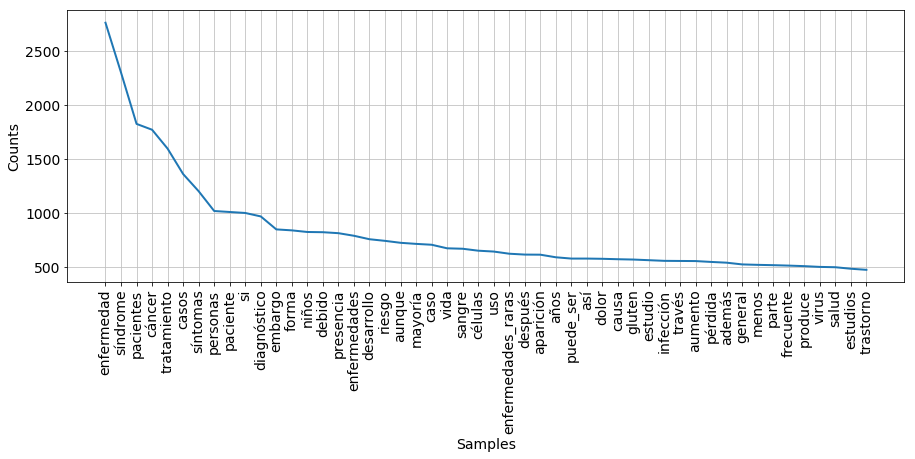

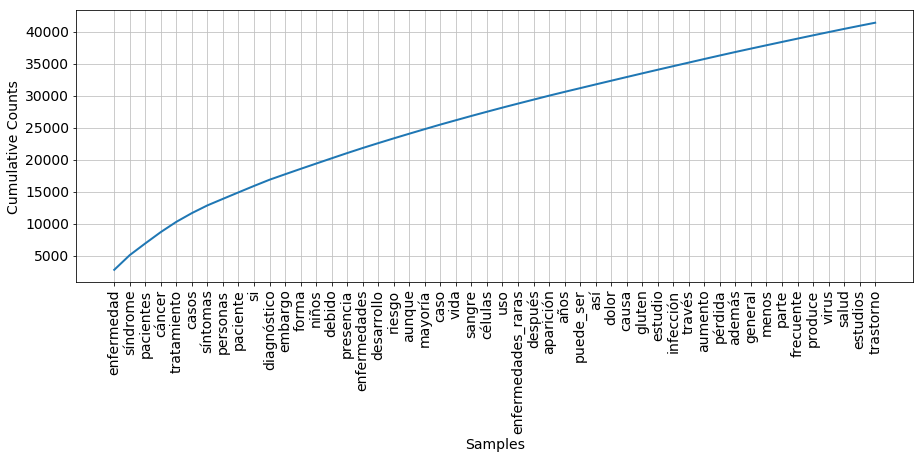

In [13]:
nuevas_palabras_principales = []
for row in enfermedadesDf.nueva_descripcion:
    nuevas_palabras_principales.extend(row.split())
nuevas_palabras_principales_populares = nltk.FreqDist(nuevas_palabras_principales)

print("Cantidad de tokens en el corpus: ", len(nuevas_palabras_principales_populares.most_common()))

lexicon_enfermedades = [w[0] for w in nuevas_palabras_principales_populares.most_common(6000)]
print("\nTokens más populares:\n{}\n...\n{}"
      .format(lexicon_enfermedades[:50], lexicon_enfermedades[5950:6000]))

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(15, 5))
nuevas_palabras_principales_populares.plot(50, cumulative=False)
plt.figure(figsize=(15, 5))
nuevas_palabras_principales_populares.plot(50, cumulative=True)

## Conclusiones
Gracias a los N-gramas podemos obtener palabras que separadas carecen de un sentido, pero aún podemos refinar más la limpieza.